In [220]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import networkx as nx
import requests
import pidotplus
import json
import re

connections = []
to_sort = []
course_codes = []

ModuleNotFoundError: No module named 'pidotplus'

In [212]:
r = requests.get("https://www.kth.se/api/kopps/v2/courses/IK.json")
r = json.loads(r.text)['courses']

for i in range(len(r)):
    course_codes.append(r[i]['code'])

r = requests.get("https://www.kth.se/api/kopps/v2/courses/SF.json")
r = json.loads(r.text)['courses']

for i in range(len(r)):
    course_codes.append(r[i]['code'])

In [213]:
def get_course_req(code):
    res = requests.get("https://www.kth.se/api/kopps/v1/course/" + code + "/plan")
    if res.status_code != 200:
        return None
    root = ET.fromstring(res.text)
    for tag in root.findall('eligibility'):
        if tag.attrib['{http://www.w3.org/XML/1998/namespace}lang'] == 'en':
            return tag.text
    
    return None

In [214]:
def extract_courses(req):
    reqs = re.findall('[A-Z][A-Z][0-9][0-9][0-9][0-9]', req)
    return reqs

In [215]:
for c in range(len(course_codes)):
    code = course_codes[c]
    req_tag = get_course_req(code)

    if req_tag is not None:
        reqs = extract_courses(req_tag)
        for j in range(len(reqs)):
            if reqs[j] in course_codes:
                connections.append((reqs[j], code))
            else:
                to_sort.append((reqs[j], code))

In [216]:
print('conn', connections)
print('to sort', to_sort)

conn [('ID1018', 'ID1020'), ('ID1018', 'ID1354'), ('ID1018', 'IV1201'), ('IV1350', 'IV1201'), ('ID1018', 'ID1214'), ('ID1019', 'ID1214'), ('ID1213', 'ID1214'), ('IV1351', 'IV1023'), ('ID2204', 'ID3014'), ('ID1018', 'IV1351'), ('ID1020', 'ID3016'), ('ID2221', 'ID3016'), ('IS1200', 'IS3202'), ('ID1018', 'IS1200'), ('ID1004', 'IS1200'), ('ID2201', 'ID2219'), ('ID2203', 'ID2219'), ('ID2210', 'ID2219'), ('IS1200', 'IS1204'), ('ID1004', 'IS1204'), ('ID1018', 'ID2213'), ('ID1020', 'ID2213'), ('SF1624', 'ID2213'), ('SF1610', 'ID2213'), ('ID1018', 'ID1213'), ('ID1020', 'ID1213'), ('SF1624', 'ID1213'), ('SF1610', 'ID1213'), ('ID1018', 'IV1303'), ('ID1018', 'ID1212'), ('ID1018', 'ID2212'), ('ID1018', 'IV1350'), ('IS1500', 'ID1200'), ('ID1018', 'ID1206'), ('IS1200', 'ID1206'), ('ID1020', 'ID1206'), ('ID1019', 'ID1206'), ('IS1500', 'ID2200'), ('ID1018', 'ID2206'), ('IS1200', 'ID2206'), ('ID1020', 'ID2206'), ('ID1019', 'ID2206'), ('ID1217', 'IS2200'), ('ID1018', 'ID1019'), ('ID1020', 'ID1019'), ('SF

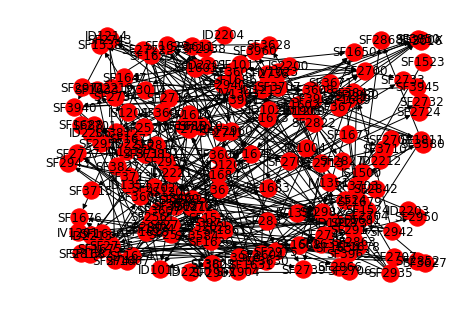

In [223]:
G = nx.DiGraph()

#for c in range(len(course_codes)):
    #G.add_node(course_codes[c])
    
for k in range(len(connections)):
    G.add_edge(connections[k][0], connections[k][1], color='blue')
    
nx.draw_random(G, with_labels=True)
#nx.write_dot(G,'courses.dot')
